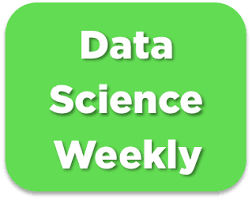

# Challenge : predict conversions 🏆🏆

This is the template that shows the different steps of the challenge. In this notebook, all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the preprocessing/training steps to get the model with the best f1-score ! May the force be with you 🧨🧨  

# Import libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

# Table of Contents <a class="anchor" id="0"></a>

I.   [Exploratory data analysis](#eda)<br>

II.  [Data visualization](#data-viz)<br>

III. [LogisticRegression](#initial-template--logisticregression-with-only-totalpagesvisited-column)<br>

   1.  [Template](#variables-and-traintestsplit) <br>
   2.  [With all columns](#variables-and-traintestsplit-for-all-cols) <br>

IV.  [Scores](#accuracy)<br>
   1. [Accurary](#accuracy)<br>
   2. [Confusion matrix](#confusion-matrix)<br>

V. [Random forest](#randomforestclassifier-with-all-columns)<br>

VI. [GridSearchCV](#gridsearchcv)<br>

VII. [LogisticRegression with GridSearchCV params](#logisticregression-with-best-hyperparameters)<br>

VIII. [Comparison of models](#last-comparison)<br>

IX. [Conclusion](#conclusion)<br>

In [2]:
# Read file with labels

data = pd.read_csv("conversion_data_train.csv")
print("Set with labels (our train+test) :", data.shape)


Set with labels (our train+test) : (284580, 6)


In [3]:
# Print the first 5 rows of the dataframe

data.head()

data.shape


(284580, 6)

# EDA

[Return to table of contents](#0)

In [4]:
# Generate descriptive statistics: summarize tendency, dispersion and shape of a data’s distribution, excluding NaN values.

data.describe(include="all")


,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [5]:
# Information about data including the index dtype and columns, non-null values and memory usage

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


In [6]:
# Distribution of target column

data.converted.value_counts(normalize=True)


0    0.967742
1    0.032258
Name: converted, dtype: float64

In [7]:
# Counts of unique rows

from locale import normalize


print(data.country.value_counts())
print()
print(data.country.value_counts(normalize=True))


US         160124
China       69122
UK          43641
Germany     11693
Name: country, dtype: int64

US         0.562668
China      0.242891
UK         0.153352
Germany    0.041089
Name: country, dtype: float64


In [8]:
# Distribution of new_user column

data.new_user.value_counts()


1    195066
0     89514
Name: new_user, dtype: int64

In [9]:
# Distribution of source column

data.source.value_counts()


Seo       139477
Ads        80027
Direct     65076
Name: source, dtype: int64

# Data Viz

[Return to table of contents](#0)

In [10]:
# The dataset is quite big : I must create a sample of the dataset before making any visualizations !
data_sample = data.sample(10000)


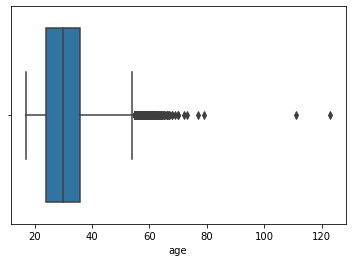

In [11]:
#Distribution of age column

sns.boxplot(x=data.age);


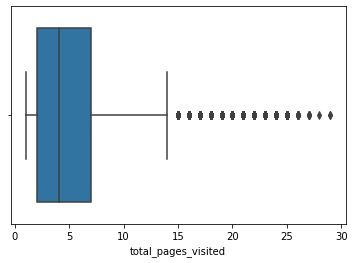

In [12]:
# Distribution of total_pages_visited column

sns.boxplot(x=data.total_pages_visited);


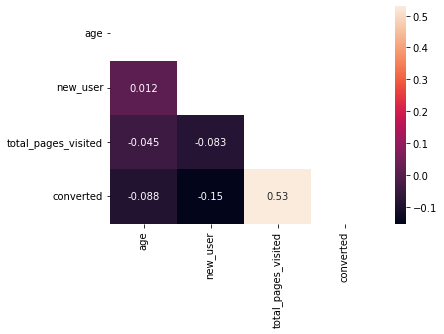

In [13]:
# Correlation matrix

mask = np.triu(np.ones_like(data.corr(), dtype=bool))

sns.heatmap(data=data.corr(), annot=True, mask=mask);


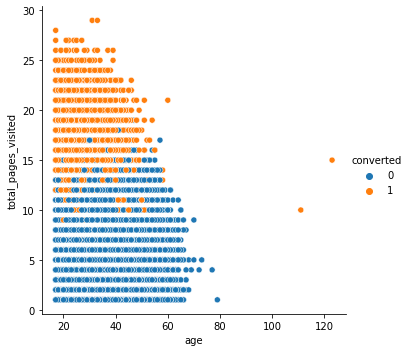

In [14]:
# Relation between age and total_pages_visited

sns.relplot(x="age", y="total_pages_visited", data=data, hue=data.converted);


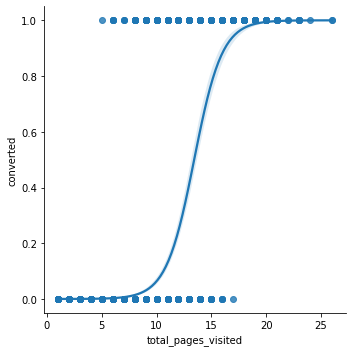

In [15]:
# Relation between converted and total_pages_visited

sns.lmplot(x="total_pages_visited", y="converted", data=data_sample, logistic=True);


# LogisticRegression

[Return to table of contents](#0)

## Initial template => LogisticRegression with only 'total_pages_visited' column

[Return to table of contents](#0)

### Variables and Train_Test_Split

In [16]:
# Choose target and features' columns

features_list = ["total_pages_visited"]
numeric_indices = [0]
categorical_indices = []
target_variable = "converted"

X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

print("Explanatory variables : ", X.columns)
print()


Explanatory variables :  Index(['total_pages_visited'], dtype='object')



In [17]:
# Divide dataset into Train set & Test set
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0, stratify=Y
)
print("...Done.")
print()


Dividing into train and test sets...
...Done.



In [18]:
print(f"X_train = {len(X_train)} rows")
print(f"Y_test = {len(Y_test)} rows")


X_train = 227664 rows
Y_test = 56916 rows


In [19]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")


Convert pandas DataFrames to numpy arrays...
...Done


### Preprocessing

In [20]:
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []

for i, t in X.dtypes.iteritems():
    if ("float" in str(t)) or ("int" in str(t)):
        numeric_features.append(i)
        numeric_indices.append(idx)
    else:
        categorical_features.append(i)
        categorical_indices.append(idx)

    idx = idx + 1

print("Found numeric features ", numeric_features, " at positions ", numeric_indices)
print(
    "Found categorical features ",
    categorical_features,
    " at positions ",
    categorical_indices,
)


Found numeric features  ['total_pages_visited']  at positions  [0]
Found categorical features  []  at positions  []


In [21]:
# numeric transformation
numeric_transformer = Pipeline(
    steps=[
        ("num_imputer", SimpleImputer(strategy="mean")),  # No NaN in the dataset
        ("num_scaler", StandardScaler()),
    ]
)
# OHE / dummyfication
categorical_transformer = OneHotEncoder(
    drop="first"
)  # drop first to drop colinearity when encoding
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_indices),
        ("num", numeric_transformer, numeric_indices),
    ]
)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print("...Done")
# Label encoding
print("Encoding labels...")
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
Y_test = encoder.transform(Y_test)


...Done
Encoding labels...


### Training pipeline

In [22]:
# Train model
print("Train model...")
classifier = LogisticRegression(random_state=30)  #
classifier.fit(X_train, Y_train)
print("...Done.")
print()


# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print()


Train model...
...Done.

Predictions on training set...
...Done.



### Test pipeline

In [23]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print()


Predictions on test set...
...Done.



### Perfs

In [24]:
print("f1-score on train set : ", round(f1_score(Y_train, Y_train_pred), 4))
print("f1-score on test set : ", round(f1_score(Y_test, Y_test_pred), 4))


f1-score on train set :  0.6991
f1-score on test set :  0.6793


In [25]:
print("Accuracy on training set : ", round(accuracy_score(Y_train, Y_train_pred), 4))
print("Accuracy on test set : ", round(accuracy_score(Y_test, Y_test_pred), 4))


Accuracy on training set :  0.9832
Accuracy on test set :  0.9821


## LogisticRegression with all columns

[Return to table of contents](#0)

### Variables and Train_Test_Split for all cols

In [26]:
# Choose target and features' columns

features_list_all = ["country", "age", "new_user", "source", "total_pages_visited"]
target_variable_all = "converted"


Xall = data.loc[:, features_list_all]
Yall = data.loc[:, target_variable_all]

print("Explanatory variables : ", Xall.columns)
print()


Explanatory variables :  Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')



In [27]:
# Divide dataset into Train set & Test set
print("Dividing into train and test sets...")
X_train_all, X_test_all, Y_train_all, Y_test_all = train_test_split(
    Xall, Yall, test_size=0.2, random_state=0, stratify=Yall
)
print("...Done.")
print()


Dividing into train and test sets...
...Done.



In [28]:
print(f"X_train_all = {len(X_train_all)} rows")
print(f"Y_test_all = {len(Y_test_all)} rows")


X_train_all = 227664 rows
Y_test_all = 56916 rows


In [29]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train_all = X_train_all.values
X_test_all = X_test_all.values
Y_train_all = Y_train_all.values
Y_test_all = Y_test_all.values
print("...Done")


Convert pandas DataFrames to numpy arrays...
...Done


### Preprocessing

In [30]:
idx = 0
numeric_features_all = []
numeric_indices_all = []
categorical_features_all = []
categorical_indices_all = []

for i, t in Xall.dtypes.iteritems():
    if ("float" in str(t)) or ("int" in str(t)):
        numeric_features_all.append(i)
        numeric_indices_all.append(idx)
    else:
        categorical_features_all.append(i)
        categorical_indices_all.append(idx)

    idx = idx + 1

print(
    "Found numeric features ",
    numeric_features_all,
    " at positions ",
    numeric_indices_all,
)
print(
    "Found categorical features ",
    categorical_features_all,
    " at positions ",
    categorical_indices_all,
)


Found numeric features  ['age', 'new_user', 'total_pages_visited']  at positions  [1, 2, 4]
Found categorical features  ['country', 'source']  at positions  [0, 3]


In [31]:
# numeric transformation
numeric_transformer_all = Pipeline(
    steps=[
        ("num_imputer", SimpleImputer(strategy="mean")),  # No NaN in the dataset
        ("num_scaler", StandardScaler()),
    ]
)
# OHE / dummyfication
categorical_transformer_all = OneHotEncoder(
    drop="first"
)  # drop first to drop colinearity when encoding
preprocessor_all = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer_all, categorical_indices_all),
        ("num", numeric_transformer_all, numeric_indices_all),
    ]
)
X_train_all = preprocessor_all.fit_transform(X_train_all)
X_test_all = preprocessor_all.transform(X_test_all)

print("...Done")
# Label encoding
print("Encoding labels...")
encoder_all = LabelEncoder()
Y_train_all = encoder_all.fit_transform(Y_train_all)
Y_test_all = encoder_all.transform(Y_test_all)


...Done
Encoding labels...


### Training pipeline

In [32]:
# Train model
print("Train model...")
classifier_all = LogisticRegression(random_state=30)  #
classifier_all.fit(X_train_all, Y_train_all)
print("...Done.")
print()


# Predictions on training set
print("Predictions on training set...")
Y_train_pred_all = classifier_all.predict(X_train_all)
print("...Done.")
print()


Train model...
...Done.

Predictions on training set...
...Done.



### Test pipeline

In [33]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred_all = classifier_all.predict(X_test_all)
print("...Done.")
print()


Predictions on test set...
...Done.



### Perfs

In [34]:
print("f1-score on train set : ", round(f1_score(Y_train_all, Y_train_pred_all), 4))
print("f1-score on test set : ", round(f1_score(Y_test_all, Y_test_pred_all), 4))


f1-score on train set :  0.7655
f1-score on test set :  0.7554


In [35]:
print(
    "Accuracy on training set : ",
    round(accuracy_score(Y_train_all, Y_train_pred_all), 4),
)
print("Accuracy on test set : ", round(accuracy_score(Y_test_all, Y_test_pred_all), 4))


Accuracy on training set :  0.9863
Accuracy on test set :  0.9858


# Scores

[Return to table of contents](#0)

## Accuracy

Our LogisticRegression models have an accuracy of ~98%. This means that for every conversion or non-conversion they classified, 98% were classified correctly.
Explained by scikit-learn: this is the percentage of the set of predicted labels that exactly match the set of labels in y_true. <br>
<br>
<br>
This does not mean that our models are excellent because we have very unbalanced classes. 96+% of the labels are 0 and the rest are 1.<br>
<br>
<br>
Our algorithms are 98% accurate but have been quite incompetent at classifying positive conversions. <br>
Another metric to measure model performance is the confusion matrix.

## Confusion matrix

Definition by lebigdata.fr : tool allowing to measure the performance of a model by checking in particular how often its predictions are correct compared to reality in classification problems. Correct and incorrect predictions are highlighted and broken down by class. The results are then compared with the actual values.


<br>

Four types of outcomes are possible:

**True Positives (TP)** – the prediction is positive, and the true value is positive

**True Negatives (TN)** – the prediction is negative, and the true value is negative

**False Positives (FP)** – the prediction is positive, BUT the true value is negative

**False Negatives (FN)** – the prediction is negative, BUT the true value is positive

<br>

<img src="confusion-matrix-exemple-768x432.jpg" width=510 height=300>


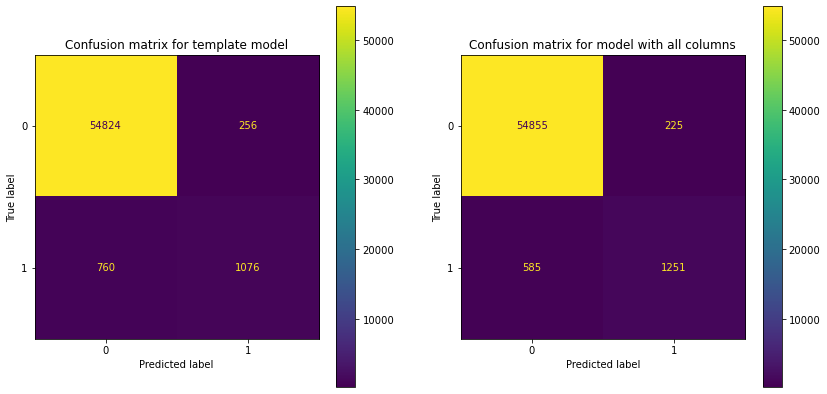

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.title.set_text("Confusion matrix for template model")
ax2.title.set_text("Confusion matrix for model with all columns")

cm = confusion_matrix(Y_test, Y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax1)

cm_all = confusion_matrix(Y_test_all, Y_test_pred_all)
ConfusionMatrixDisplay(confusion_matrix=cm_all).plot(ax=ax2);


### Interpretation of confusion matrix

Thanks to the confusion matrix, we can see that by passing from the model with only one column taken into account to the model with all the columns the TP and TN increase by reducing the FP and FN. <br>

And this is a good point



# RandomForestClassifier with all columns

[Return to table of contents](#0)

## Variables and Train_Test_Split for all cols

In [37]:
# Choose target and features' columns

features_list_forest = ["country", "age", "new_user", "source", "total_pages_visited"]
target_variable_forest = "converted"


Xforest = data.loc[:, features_list_forest]
Yforest = data.loc[:, target_variable_forest]

print("Explanatory variables : ", Xforest.columns)
print()


Explanatory variables :  Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')



In [38]:
# Divide dataset into Train set & Test set
print("Dividing into train and test sets...")
X_train_forest, X_test_forest, Y_train_forest, Y_test_forest = train_test_split(
    Xforest, Yforest, test_size=0.2, random_state=0, stratify=Yforest
)
print("...Done.")
print()


Dividing into train and test sets...
...Done.



In [39]:
print(f"X_train_forest = {len(X_train_forest)} rows")
print(f"Y_test_forest = {len(Y_test_forest)} rows")


X_train_forest = 227664 rows
Y_test_forest = 56916 rows


In [40]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train_forest = X_train_forest.values
X_test_forest = X_test_forest.values
Y_train_forest = Y_train_forest.values
Y_test_forest = Y_test_forest.values
print("...Done")


Convert pandas DataFrames to numpy arrays...
...Done


## Preprocessing

In [41]:
idx = 0
numeric_features_forest = []
numeric_indices_forest = []
categorical_features_forest = []
categorical_indices_forest = []

for i, t in Xforest.dtypes.iteritems():
    if ("float" in str(t)) or ("int" in str(t)):
        numeric_features_forest.append(i)
        numeric_indices_forest.append(idx)
    else:
        categorical_features_forest.append(i)
        categorical_indices_forest.append(idx)

    idx = idx + 1

print(
    "Found numeric features ",
    numeric_features_forest,
    " at positions ",
    numeric_indices_forest,
)
print(
    "Found categorical features ",
    categorical_features_forest,
    " at positions ",
    categorical_indices_forest,
)


Found numeric features  ['age', 'new_user', 'total_pages_visited']  at positions  [1, 2, 4]
Found categorical features  ['country', 'source']  at positions  [0, 3]


In [42]:
# numeric transformation
numeric_transformer_forest = Pipeline(
    steps=[
        ("num_imputer", SimpleImputer(strategy="mean")),  # No NaN in the dataset
        ("num_scaler", StandardScaler()),
    ]
)
# OHE / dummyfication
categorical_transformer_forest = OneHotEncoder(
    drop="first"
)  # drop first to drop colinearity when encoding
preprocessor_forest = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer_forest, categorical_indices_forest),
        ("num", numeric_transformer_forest, numeric_indices_forest),
    ]
)
X_train_forest = preprocessor_forest.fit_transform(X_train_forest)
X_test_forest = preprocessor_forest.transform(X_test_forest)

print("...Done")
# Label encoding
print("Encoding labels...")
encoder_forest = LabelEncoder()
Y_train_forest = encoder_forest.fit_transform(Y_train_forest)
Y_test_forest = encoder_forest.transform(Y_test_forest)


...Done
Encoding labels...


## Training pipeline

In [43]:
# Train model
print("Train model...")
classifier_forest = RandomForestClassifier(random_state=30)
classifier_forest.fit(X_train_forest, Y_train_forest)
print("...Done.")
print()


# Predictions on training set
print("Predictions on training set...")
Y_train_pred_forest = classifier_forest.predict(X_train_forest)
print("...Done.")
print()


Train model...
...Done.

Predictions on training set...
...Done.



## Test pipeline

In [44]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred_forest = classifier_forest.predict(X_test_forest)
print("...Done.")
print()


Predictions on test set...
...Done.



## Perfs

In [45]:
print(
    "f1-score on train set : ", round(f1_score(Y_train_forest, Y_train_pred_forest), 4)
)
print("f1-score on test set : ", round(f1_score(Y_test_forest, Y_test_pred_forest), 4))


f1-score on train set :  0.8068
f1-score on test set :  0.733


In [46]:
print(
    "Accuracy on training set : ",
    round(accuracy_score(Y_train_forest, Y_train_pred_forest), 4),
)
print(
    "Accuracy on test set : ",
    round(accuracy_score(Y_test_forest, Y_test_pred_forest), 4),
)


Accuracy on training set :  0.9886
Accuracy on test set :  0.9843


## Comparison of models

[Return to table of contents](#0)

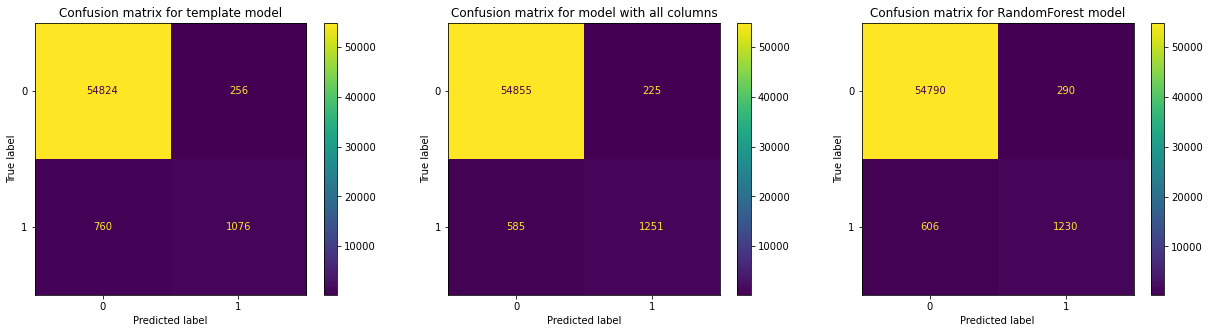

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

ax1.title.set_text("Confusion matrix for template model")
ax2.title.set_text("Confusion matrix for model with all columns")
ax3.title.set_text("Confusion matrix for RandomForest model")

cm_template = confusion_matrix(Y_test, Y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_template).plot(ax=ax1)

cm_all = confusion_matrix(Y_test_all, Y_test_pred_all)
cm_all_show = ConfusionMatrixDisplay(confusion_matrix=cm_all).plot(ax=ax2)

cm_forest = confusion_matrix(Y_test_forest, Y_test_pred_forest)
cm_forest_show = ConfusionMatrixDisplay(confusion_matrix=cm_forest).plot(ax=ax3);


Here we can see that the RandomForestClassifier🌲🌳  model performs worse than the LogisticRegression model.

# GridSearchCV

[Return to table of contents](#0)

In [48]:
# Perform grid search

print("Grid search...")
CV = LogisticRegression()

# Grid of values to be tested
params = {
    "C": [0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet"],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
}

gridsearch = GridSearchCV(
    CV, param_grid=params, cv=10
)  # cv : the number of folds to be used for CV
gridsearch.fit(X_train_all, Y_train_all)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)  # to obtain best hyperparams
print(
    "Best validation accuracy : ", gridsearch.best_score_
)  # to obtain best score trained


Grid search...


/Users/alexlasnier/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
400 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/alexlasnier/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alexlasnier/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/alexlasnier/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_

...Done.
Best hyperparameters :  {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best validation accuracy :  0.9863395232818177


Best hyperparameters :  {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'} <br>
Best validation accuracy :  0.9863439154111052

# LogisticRegression with best hyperparameters

[Return to table of contents](#0)

## Variables and Train_Test_Split for all cols

In [49]:
# Choose target and features' columns

features_list_CV = ["country", "age", "new_user", "source", "total_pages_visited"]
target_variable_CV = "converted"


XCV = data.loc[:, features_list_CV]
YCV = data.loc[:, target_variable_CV]

print("Explanatory variables : ", XCV.columns)
print()


Explanatory variables :  Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')



In [50]:
# Divide dataset into Train set & Test set
print("Dividing into train and test sets...")
X_train_CV, X_test_CV, Y_train_CV, Y_test_CV = train_test_split(
    XCV, YCV, test_size=0.2, random_state=0, stratify=YCV
)
print("...Done.")
print()


Dividing into train and test sets...
...Done.



In [51]:
print(f"X_train_CV = {len(X_train_CV)} rows")
print(f"Y_test_CV = {len(Y_test_CV)} rows")


X_train_CV = 227664 rows
Y_test_CV = 56916 rows


In [52]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train_CV = X_train_CV.values
X_test_CV = X_test_CV.values
Y_train_CV = Y_train_CV.values
Y_test_CV = Y_test_CV.values
print("...Done")


Convert pandas DataFrames to numpy arrays...
...Done


## Preprocessing

In [53]:
idx = 0
numeric_features_CV = []
numeric_indices_CV = []
categorical_features_CV = []
categorical_indices_CV = []

for i, t in XCV.dtypes.iteritems():
    if ("float" in str(t)) or ("int" in str(t)):
        numeric_features_CV.append(i)
        numeric_indices_CV.append(idx)
    else:
        categorical_features_CV.append(i)
        categorical_indices_CV.append(idx)

    idx = idx + 1

print(
    "Found numeric features ",
    numeric_features_CV,
    " at positions ",
    numeric_indices_CV,
)
print(
    "Found categorical features ",
    categorical_features_CV,
    " at positions ",
    categorical_indices_CV,
)


Found numeric features  ['age', 'new_user', 'total_pages_visited']  at positions  [1, 2, 4]
Found categorical features  ['country', 'source']  at positions  [0, 3]


In [54]:
# numeric transformation
numeric_transformer_CV = Pipeline(
    steps=[
        ("num_imputer", SimpleImputer(strategy="mean")),  # No NaN in the dataset
        ("num_scaler", StandardScaler()),
    ]
)
# OHE / dummyfication
categorical_transformer_CV = OneHotEncoder(
    drop="first"
)  # drop first to drop colinearity when encoding
preprocessor_CV = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer_CV, categorical_indices_CV),
        ("num", numeric_transformer_CV, numeric_indices_CV),
    ]
)
X_train_CV = preprocessor_CV.fit_transform(X_train_CV)
X_test_CV = preprocessor_CV.transform(X_test_CV)

print("...Done")
# Label encoding
print("Encoding labels...")
encoder_CV = LabelEncoder()
Y_train_CV = encoder_CV.fit_transform(Y_train_CV)
Y_test_CV = encoder_CV.transform(Y_test_CV)


...Done
Encoding labels...


## Training pipeline

In [55]:
# Train model
print("Train model...")
classifier_CV = LogisticRegression(random_state=30, C=0.1, penalty="l1", solver="saga")
classifier_CV.fit(X_train_CV, Y_train_CV)
print("...Done.")
print()


# Predictions on training set
print("Predictions on training set...")
Y_train_pred_CV = classifier_CV.predict(X_train_CV)
print("...Done.")
print()


Train model...
...Done.

Predictions on training set...
...Done.



## Test pipeline

In [56]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred_CV = classifier_CV.predict(X_test_CV)
print("...Done.")
print()


Predictions on test set...
...Done.



## Perfs

In [57]:
print("f1-score on train set : ", round(f1_score(Y_train_CV, Y_train_pred_CV), 4))
print("f1-score on test set : ", round(f1_score(Y_test_CV, Y_test_pred_CV), 4))


f1-score on train set :  0.7652
f1-score on test set :  0.7554


In [58]:
print(
    "Accuracy on training set : ",
    round(accuracy_score(Y_train_CV, Y_train_pred_CV), 4),
)
print("Accuracy on test set : ", round(accuracy_score(Y_test_CV, Y_test_pred_CV), 4))


Accuracy on training set :  0.9863
Accuracy on test set :  0.9858


# Last comparison

[Return to table of contents](#0)

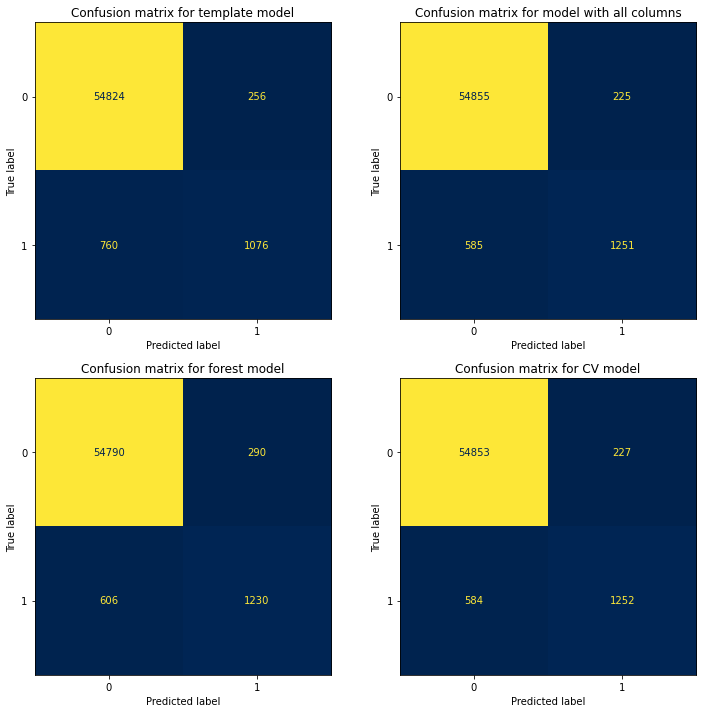

In [59]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.title.set_text("Confusion matrix for template model")
ax2.title.set_text("Confusion matrix for model with all columns")
ax3.title.set_text("Confusion matrix for forest model")
ax4.title.set_text("Confusion matrix for CV model")

cm_template = confusion_matrix(Y_test, Y_test_pred, labels=classifier.classes_)
ConfusionMatrixDisplay(
    confusion_matrix=cm_template, display_labels=classifier.classes_
).plot(ax=ax1, colorbar=False, cmap="cividis")

cm_all = confusion_matrix(Y_test_all, Y_test_pred_all)
ConfusionMatrixDisplay(confusion_matrix=cm_all).plot(
    ax=ax2, colorbar=False, cmap="cividis"
)

cm_forest = confusion_matrix(Y_test_forest, Y_test_pred_forest)
ConfusionMatrixDisplay(confusion_matrix=cm_forest).plot(
    ax=ax3, colorbar=False, cmap="cividis"
)

cm_cv = confusion_matrix(Y_test_CV, Y_test_pred_CV)
ConfusionMatrixDisplay(confusion_matrix=cm_cv).plot(
    ax=ax4, colorbar=False, cmap="cividis"
);


# Conclusion

[Return to table of contents](#0)

**The best solution is not always the most complex and technical. Often the simplest solution is the most effective.**